In [239]:
import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(
    host="212.227.90.6",
    database="Equip_14",
    user="Equipo14",
    password="E1q2u3i4p5o14"
)

cursor = mydb.cursor()
cursor.execute("SELECT * FROM RRHH_08072025") 

resultados = cursor.fetchall()

columnas = [desc[0] for desc in cursor.description]
df_rrhh = pd.DataFrame(resultados, columns=columnas)

df_rrhh 
df_rrhh.info()
df_rrhh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       845 non-null    int64 
 1   Reason_absence           845 non-null    int64 
 2   Month_absence            845 non-null    int64 
 3   Day_week                 845 non-null    int64 
 4   Seasons                  845 non-null    int64 
 5   Transportation_expense   845 non-null    int64 
 6   Distance_Residence_Work  845 non-null    int64 
 7   Service_time             845 non-null    int64 
 8   Age                      845 non-null    int64 
 9   Work_load_Average_day    845 non-null    object
 10  Hit_target               845 non-null    int64 
 11  Disciplinary_failure     845 non-null    object
 12  Education                845 non-null    object
 13  Son                      845 non-null    object
 14  Social_drinker           845 non-null    o

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112


In [240]:
df_rrhh.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Hit_target,Weight,Height,Body_mass_index,Absenteeism_hours
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,26.128994,19.119527,6.325444,3.889941,2.539645,221.389349,29.452071,12.489941,36.453254,94.610651,78.848521,172.023669,26.639053,7.513609
std,26.374062,8.396493,3.406417,1.413696,1.113213,67.278062,14.737647,4.303801,6.512056,3.749708,12.915998,5.914831,4.317235,15.370198
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,69.000000,169.000000,24.000000,2.000000
50%,20.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,12.000000,37.000000,95.000000,80.000000,170.000000,25.000000,3.000000
75%,33.000000,26.000000,9.000000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,97.000000,89.000000,172.000000,31.000000,8.000000
max,136.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,108.000000,196.000000,38.000000,120.000000


In [241]:
df_rrhh = df_rrhh.drop_duplicates()
df_rrhh = df_rrhh.sort_values(by='ID').reset_index(drop=True)
df_rrhh

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,18,11,4,4,235,11,14,37,"284,031",...,0,3,1,0,0,1,88,172,29,1
1,1,13,1,3,2,235,11,14,37,"330,061",...,0,3,1,0,0,1,88,172,29,1
2,1,13,6,6,3,235,11,14,37,"377,550",...,0,3,1,0,0,1,88,172,29,16
3,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
4,1,0,3,5,3,235,11,14,37,"244,387",...,1,3,1,0,0,1,88,172,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,132,23,3,4,2,289,36,13,33,"222,196",...,0,1,2,1,0,1,90,172,30,8
802,133,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
803,134,10,4,4,3,118,10,10,37,"246,288",...,0,1,0,0,0,0,83,172,28,2
804,135,23,12,2,4,225,26,9,28,"280,549",...,0,1,1,0,0,2,69,169,24,2


In [242]:
df_rrhh["Disciplinary_failure"] = df_rrhh["Disciplinary_failure"].astype(int)
df_rrhh["Social_drinker"] = df_rrhh["Social_drinker"].astype(int)
df_rrhh["Social_smoker"] = df_rrhh["Social_smoker"].astype(int)
df_rrhh["Pet"] = df_rrhh["Pet"].astype(int)
df_rrhh["Education"] = df_rrhh["Education"].astype(int)
df_rrhh["Son"] = df_rrhh["Son"].astype(int)
df_rrhh['Work_load_Average_day'] = df_rrhh['Work_load_Average_day'].astype(str).str.replace(',', '.', regex=False).astype(float)

df_rrhh.head(36)

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,18,11,4,4,235,11,14,37,284.031,...,0,3,1,0,0,1,88,172,29,1
1,1,13,1,3,2,235,11,14,37,330.061,...,0,3,1,0,0,1,88,172,29,1
2,1,13,6,6,3,235,11,14,37,377.550,...,0,3,1,0,0,1,88,172,29,16
3,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
4,1,0,3,5,3,235,11,14,37,244.387,...,1,3,1,0,0,1,88,172,29,0
5,1,14,12,3,2,235,11,14,37,236.629,...,0,3,1,0,0,1,88,172,29,4
6,1,23,12,2,4,235,11,14,37,236.629,...,0,3,1,0,0,1,88,172,29,3
7,1,22,4,6,3,235,11,14,37,246.288,...,0,3,1,0,0,1,88,172,29,8
8,1,21,3,5,2,235,11,14,37,244.387,...,0,3,1,0,0,1,88,172,29,8
9,1,26,10,2,4,235,11,14,37,265.017,...,0,3,1,0,0,1,88,172,29,4


In [243]:
df_rrhh["Disciplinary_failure"] = df_rrhh["Disciplinary_failure"].astype(bool)
df_rrhh["Social_drinker"] = df_rrhh["Social_drinker"].astype(bool)
df_rrhh["Social_smoker"] = df_rrhh["Social_smoker"].astype(bool)

In [244]:
df_rrhh_abs = df_rrhh[['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons', 
           'Work_load_Average_day', 'Hit_target', 'Absenteeism_hours']]
df_rrhh_abs = df_rrhh_abs.sort_values(by='ID').reset_index(drop=True)
df_rrhh_abs

,ID,Reason_absence,Month_absence,Day_week,Seasons,Work_load_Average_day,Hit_target,Absenteeism_hours
0,1,18,11,4,4,284.031,97,1
1,1,26,12,4,4,261.306,97,8
2,1,19,8,5,1,265.615,94,8
3,1,23,8,5,1,205.917,92,4
4,1,23,8,3,1,265.615,94,1
...,...,...,...,...,...,...,...,...
801,132,23,3,4,2,222.196,99,8
802,133,0,0,3,1,271.219,95,0
803,134,10,4,4,3,246.288,91,2
804,135,23,12,2,4,280.549,98,2


In [245]:
df_rrhh_nodup = df_rrhh.drop_duplicates(subset="ID")
df_rrhh_nodup = df_rrhh_nodup.sort_values(by='ID').reset_index(drop=True)
df_rrhh_nodup.index = df_rrhh_nodup.index + 1

columns_to_keep = [
    "ID", "Transportation_expense", "Distance_Residence_Work",
    "Service_time", "Age", "Disciplinary_failure", "Education", "Son",
    "Social_drinker", "Social_smoker", "Pet", "Weight", "Height", "Body_mass_index"
]

df_rrhh_nodup = df_rrhh_nodup[columns_to_keep]
df_rrhh_nodup

,ID,Transportation_expense,Distance_Residence_Work,Service_time,Age,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index
1,1,235,11,14,37,False,3,1,False,False,1,88,172,29
2,2,235,29,12,48,False,1,1,False,True,5,88,163,33
3,3,179,51,18,38,False,1,0,True,False,0,89,170,31
4,4,118,14,13,40,False,1,1,True,False,8,98,170,34
5,5,235,20,13,43,False,1,1,True,False,0,106,167,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,289,36,13,33,False,1,2,True,False,1,90,172,30
133,133,118,14,13,40,False,1,1,True,False,8,98,170,34
134,134,118,10,10,37,False,1,0,False,False,0,83,172,28
135,135,225,26,9,28,False,1,1,False,False,2,69,169,24


In [291]:
df_rrhh.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Education,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
count,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,26.667494,18.878412,6.400744,3.873449,2.545906,223.024814,29.236973,12.423077,36.421836,271.871385,94.569479,1.295285,1.058313,0.790323,78.817618,172.063275,26.612903,7.052109
std,26.754204,8.431830,3.380904,1.418201,1.121114,67.654011,14.617769,4.289628,6.494391,39.539519,3.774318,0.679534,1.110234,1.367577,12.885650,5.976951,4.294909,13.116005
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,1.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,11.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,92.000000,1.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,21.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,12.000000,37.000000,264.604000,95.000000,1.000000,1.000000,0.000000,80.000000,170.500000,25.000000,3.000000
75%,33.000000,26.000000,9.000000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,284.853000,97.000000,1.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,136.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,4.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


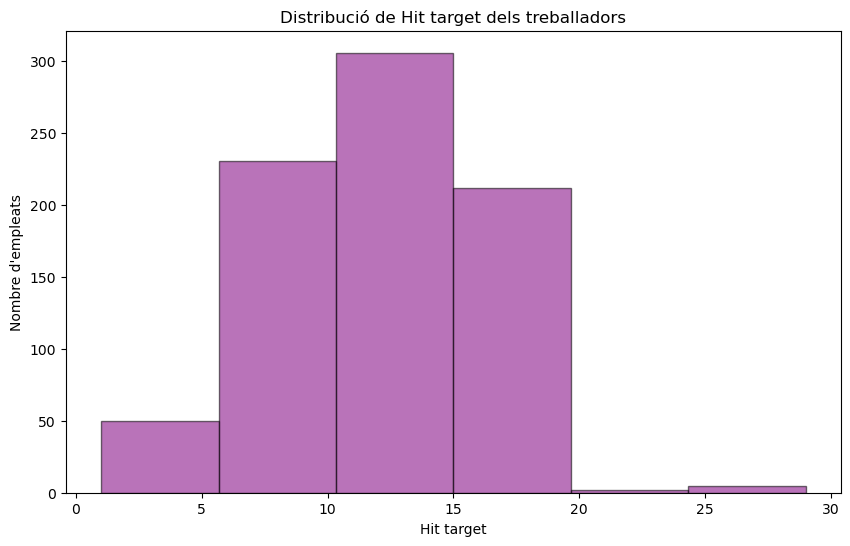

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.hist(df_rrhh['Hit_target'], bins=6, edgecolor="black", color='purple', alpha=0.55)

plt.title("Distribució de Hit target dels treballadors")
plt.xlabel("Hit target")
plt.ylabel("Nombre d'empleats")

plt.show()

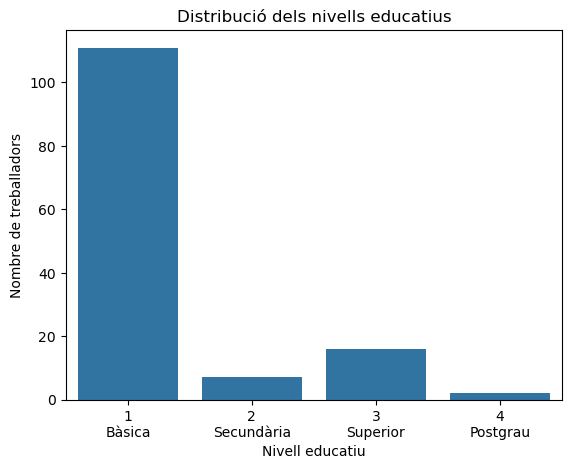

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Education', data=df_rrhh_nodup)
plt.title("Distribució dels nivells educatius")
plt.xlabel("Nivell educatiu")
plt.ylabel("Nombre de treballadors")
plt.xticks([0, 1, 2, 3], ['1\nBàsica', '2\nSecundària', '3\nSuperior', '4\nPostgrau'])
plt.show()


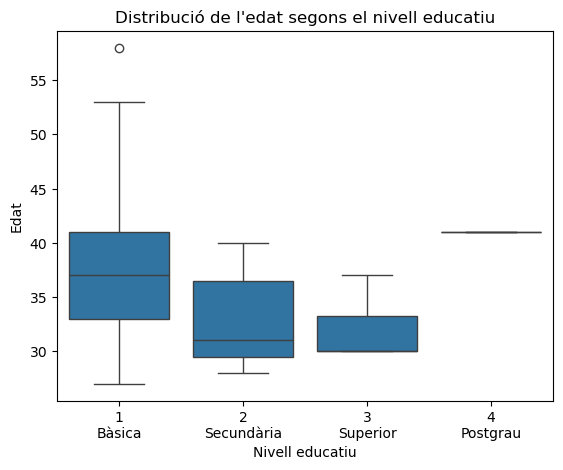

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Education', y='Age', data=df_rrhh_nodup)
plt.title("Distribució de l'edat segons el nivell educatiu")
plt.xlabel("Nivell educatiu")
plt.ylabel("Edat")
plt.xticks([0, 1, 2, 3], ['1\nBàsica', '2\nSecundària', '3\nSuperior', '4\nPostgrau'])
plt.show()

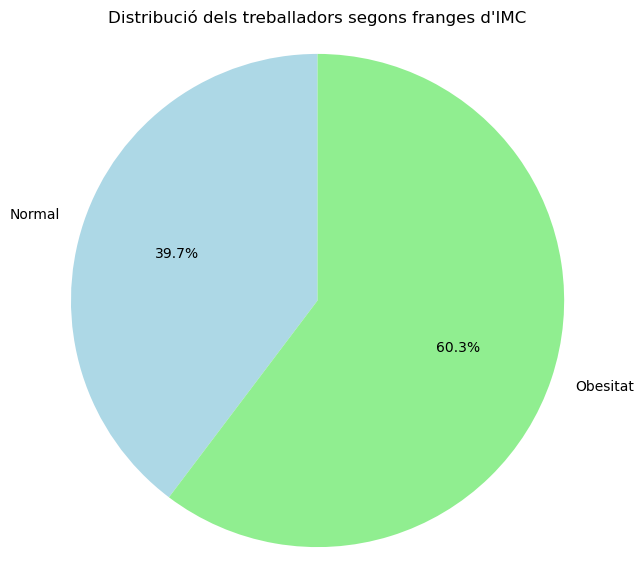

In [251]:
import matplotlib.pyplot as plt
import pandas as pd

def classificar_imc(imc):
    if imc < 25:
        return 'Normal'
    else:
        return 'Obesitat'

df_rrhh_nodup['Body_mass_index'] = df_rrhh_nodup['Body_mass_index'].apply(classificar_imc)

counts = df_rrhh_nodup['Body_mass_index'].value_counts().sort_index()
labels = counts.index
colors = ['lightblue', 'lightgreen', 'gold', 'orange', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribució dels treballadors segons franges d'IMC")
plt.axis('equal')
plt.show()


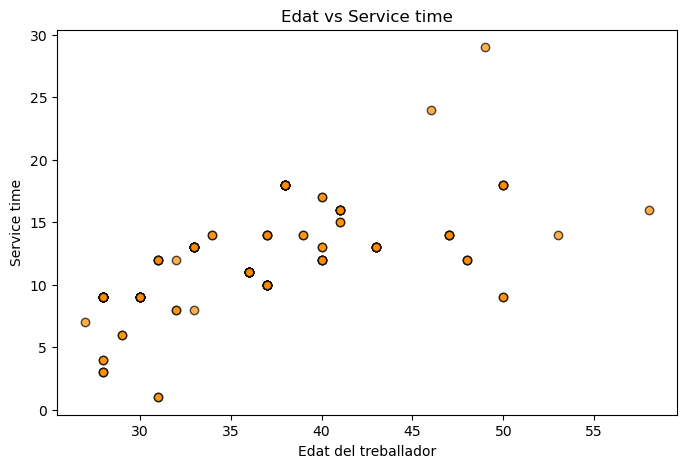

In [253]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))

plt.scatter(df_rrhh_nodup["Age"], df_rrhh_nodup["Service_time"], alpha=0.7, color='darkorange', edgecolor='black')
plt.title("Edat vs Service time")
plt.xlabel("Edat del treballador")
plt.ylabel("Service time")

plt.show()

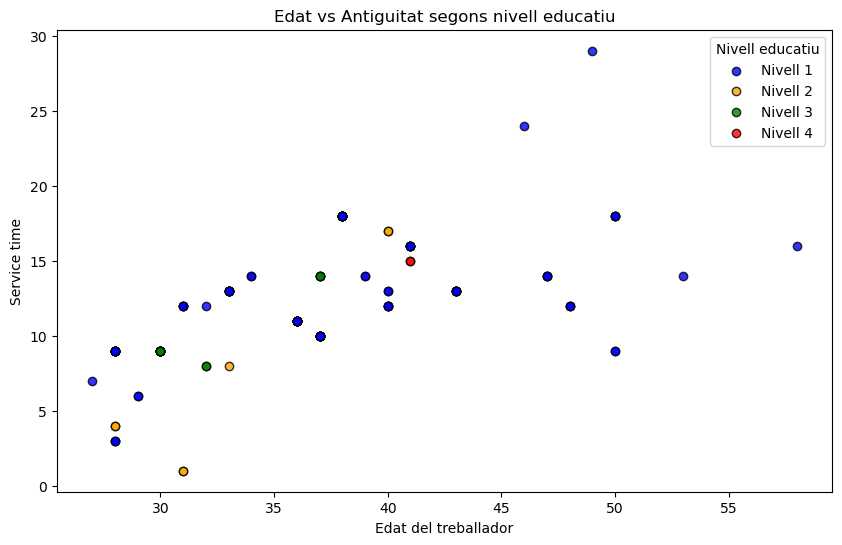

In [254]:
colors = {
    1: 'blue',    
    2: 'orange',   
    3: 'green',    
    4: 'red'       
}

plt.figure(figsize=(10, 6))

for level in sorted(df_rrhh_nodup['Education'].unique()):
    subset = df_rrhh_nodup[df_rrhh_nodup['Education'] == level]
    plt.scatter(subset['Age'], subset['Service_time'], 
                c=colors[level], label=f"Nivell {level}", alpha=0.8, edgecolors='k')

plt.xlabel("Edat del treballador")
plt.ylabel("Service time")
plt.title("Edat vs Antiguitat segons nivell educatiu")
plt.legend(title="Nivell educatiu")

plt.show()

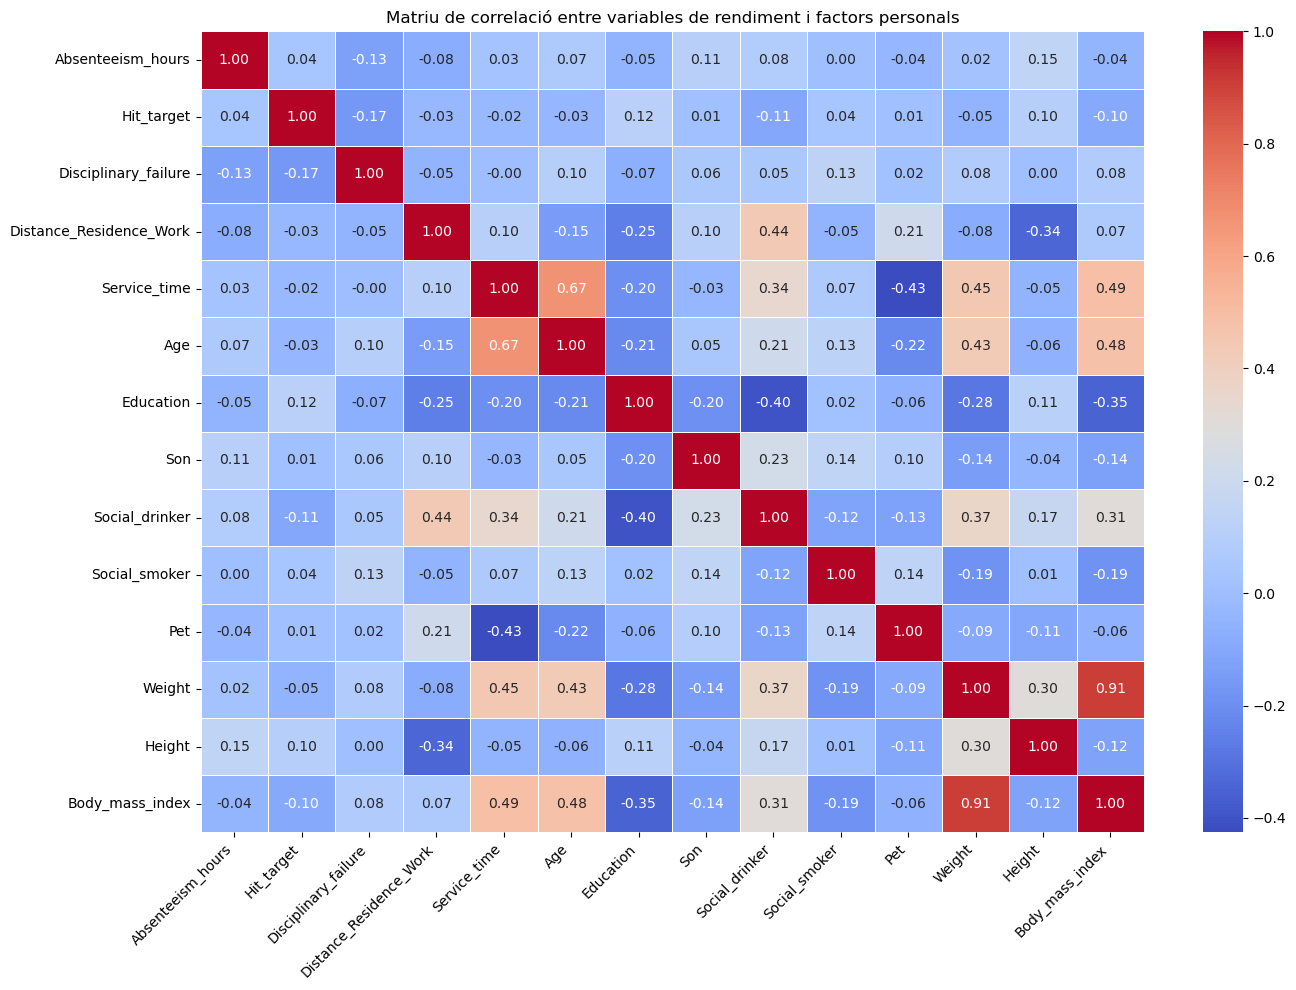

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_principals = [
    'Absenteeism_hours', 'Hit_target', 'Disciplinary_failure'
]

variables_comparables = [
    'Distance_Residence_Work', 'Service_time', 'Age', 'Education', 'Son',
    'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index'
]

cols = variables_principals + variables_comparables
corr_matrix = df_rrhh[cols].corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriu de correlació entre variables de rendiment i factors personals")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


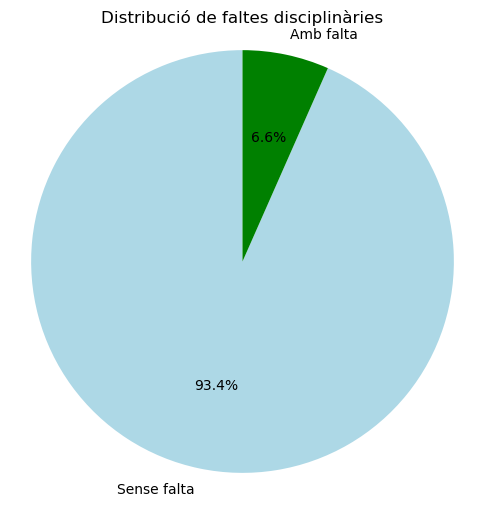

In [259]:
import matplotlib.pyplot as plt

counts = df_rrhh_nodup['Disciplinary_failure'].value_counts()

labels = ['Sense falta', 'Amb falta'] if counts.index[0] == False else ['Amb falta', 'Sense falta']

colors = ['lightblue', 'green']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Distribució de faltes disciplinàries")
plt.axis('equal')  
plt.show()



   Disciplinary_failure  Hit_target
0                 False   94.722733
1                  True   91.977778


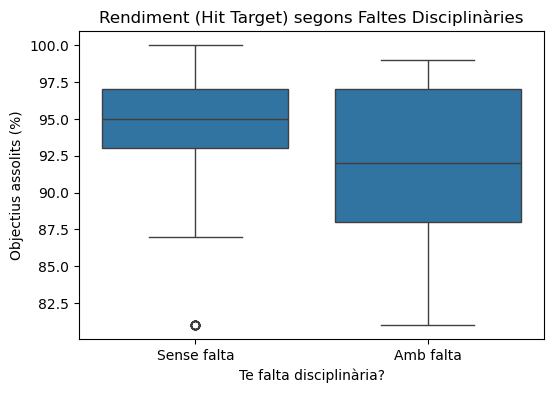

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

grouped = df_rrhh.groupby('Disciplinary_failure')['Hit_target'].mean().reset_index()
print(grouped)

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_rrhh, 
    x='Disciplinary_failure', 
    y='Hit_target')

plt.title("Rendiment (Hit Target) segons Faltes Disciplinàries")
plt.xlabel("Te falta disciplinària?")
plt.ylabel("Objectius assolits (%)")
plt.xticks([0, 1], ["Sense falta", "Amb falta"])
plt.show()

In [262]:
correlacions = df_rrhh.corr(numeric_only=True)
print(correlacions["Hit_target"].sort_values(ascending=False))


Hit_target                 1.000000
Education                  0.118889
Height                     0.098566
Reason_absence             0.090864
Absenteeism_hours          0.039249
Social_smoker              0.037886
ID                         0.035363
Day_week                   0.027405
Son                        0.011928
Pet                        0.010888
Service_time              -0.021882
Distance_Residence_Work   -0.028500
Age                       -0.031047
Seasons                   -0.048607
Weight                    -0.048665
Transportation_expense    -0.069711
Work_load_Average_day     -0.081424
Body_mass_index           -0.096735
Social_drinker            -0.105747
Disciplinary_failure      -0.167082
Month_absence             -0.452863
Name: Hit_target, dtype: float64


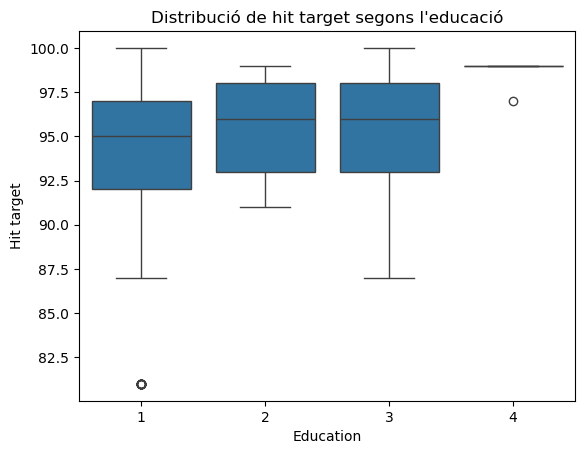

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='Hit_target', x='Education', data=df_rrhh)
plt.title("Distribució de hit target segons l'educació")
plt.ylabel("Hit target")
plt.xlabel("Education")

plt.show()

In [264]:
correlacions = df_rrhh_nodup.corr(numeric_only=True)
print(correlacions["Disciplinary_failure"].sort_values(ascending=False))


Disciplinary_failure       1.000000
Social_smoker              0.189540
Height                     0.139402
Transportation_expense     0.124532
Distance_Residence_Work    0.062100
Weight                     0.058980
Pet                        0.046833
Social_drinker             0.025667
Son                       -0.015831
Age                       -0.039031
Service_time              -0.074131
Education                 -0.079254
ID                        -0.129966
Name: Disciplinary_failure, dtype: float64


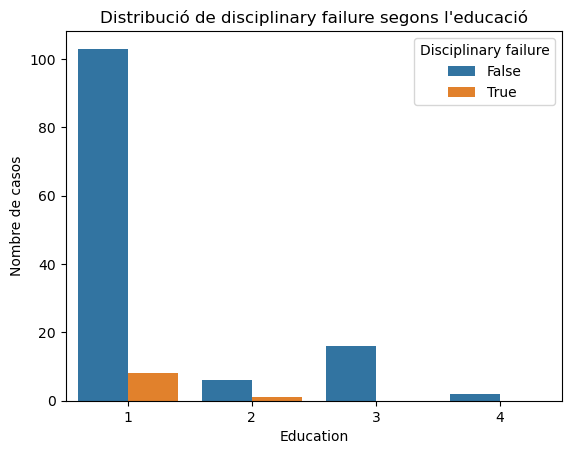

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Education', hue='Disciplinary_failure', data=df_rrhh_nodup)
plt.title("Distribució de disciplinary failure segons l'educació")
plt.xlabel("Education")
plt.ylabel("Nombre de casos")
plt.legend(title='Disciplinary failure')
plt.show()


In [282]:
correlacions = df_rrhh.corr(numeric_only=True)
print(correlacions["Absenteeism_hours"].sort_values(ascending=False))

Absenteeism_hours          1.000000
Height                     0.147327
Son                        0.108644
Social_drinker             0.082052
Age                        0.065193
Hit_target                 0.039249
Transportation_expense     0.037646
Service_time               0.028421
Weight                     0.020938
Month_absence              0.013675
Work_load_Average_day      0.010302
Social_smoker              0.004181
Seasons                   -0.008949
Pet                       -0.035818
ID                        -0.038134
Body_mass_index           -0.044495
Education                 -0.050092
Distance_Residence_Work   -0.078942
Day_week                  -0.117450
Disciplinary_failure      -0.130828
Reason_absence            -0.156536
Name: Absenteeism_hours, dtype: float64


In [284]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = ['Education', 'Disciplinary_failure', 'Hit_target', 'Absenteeism_hours', 'Service_time']
df_cluster = df_rrhh[features].copy()

df_cluster['Disciplinary_failure'] = df_cluster['Disciplinary_failure'].astype(int)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled_data)

print(df_cluster.groupby('cluster').mean())

         Education  Disciplinary_failure  Hit_target  Absenteeism_hours  \
cluster                                                                   
0         1.032558                   0.0   94.578295           7.773643   
1         2.827586                   0.0   95.525862           5.775862   
2         1.111111                   1.0   91.977778           0.000000   

         Service_time  
cluster                
0           13.034109  
1            9.025862  
2           12.422222  


In [269]:
efficiency_index = df_rrhh['Hit_target'].sum() / df_rrhh['Work_load_Average_day'].sum()

print("Índex d'eficiència relativa per càrrega laboral:", efficiency_index)

Índex d'eficiència relativa per càrrega laboral: 0.34784638715095245
